# Customer Segmentation using K-Means

1. Importing the libraries
2. Data Exploration
3. Data Visualization
4. Data Preprocessing
5. Clustering using K-Means
6. Plotting the Clusters
7. 3D Plot of Clusters

## Importing Dependancies

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

## Data Exploration

In [91]:
# Loading the data
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [92]:
# Dimensions of dataset: 200 rows, 5 columns
df.shape

(200, 5)

In [93]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [94]:
# Checking null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Data Visualization

In [95]:
plt.style.use('seaborn-v0_8-dark')

### Histograms of the `Age`, `Annual Income (k$)`, and `Spending Score (1-100)`

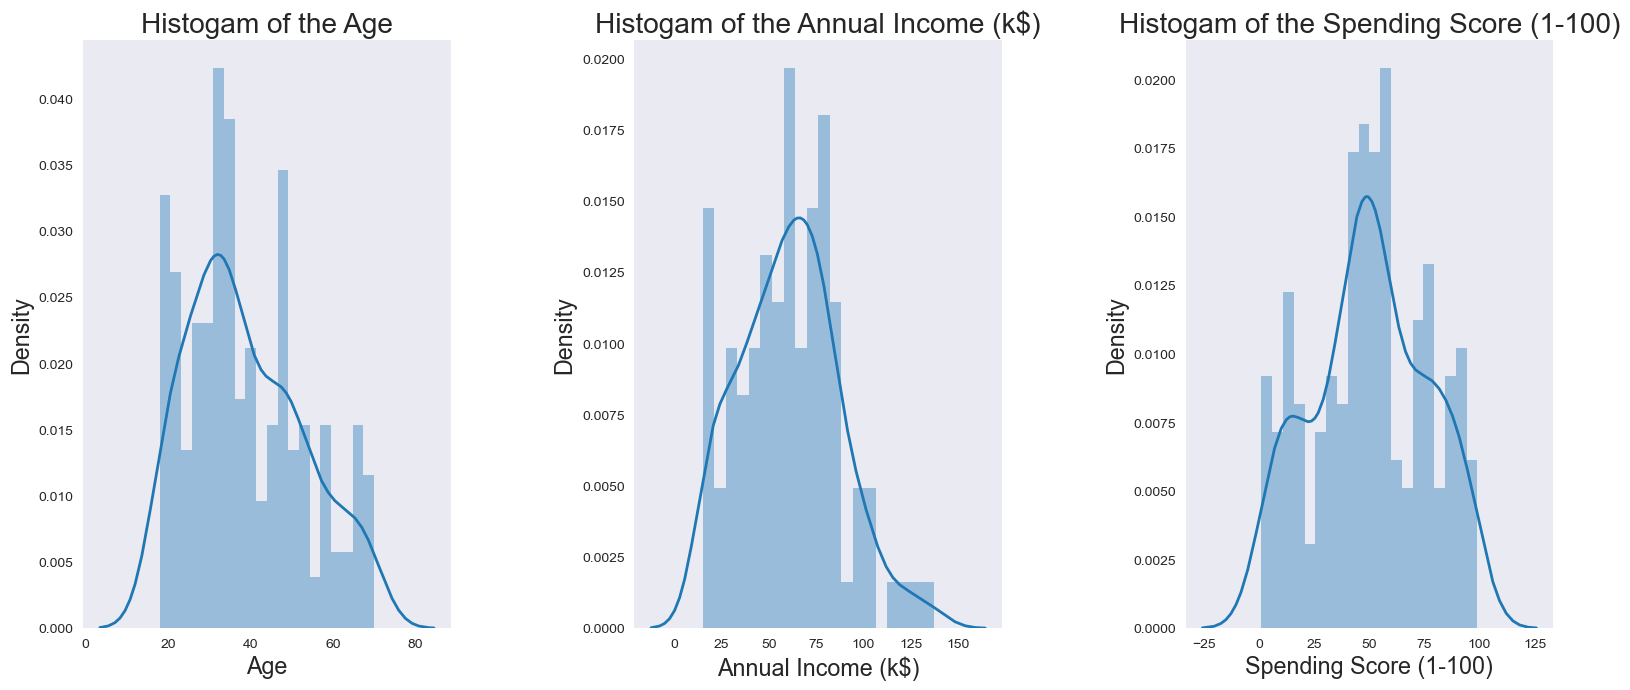

In [96]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title(f'Histogam of the {x}')
plt.show()

### Gender

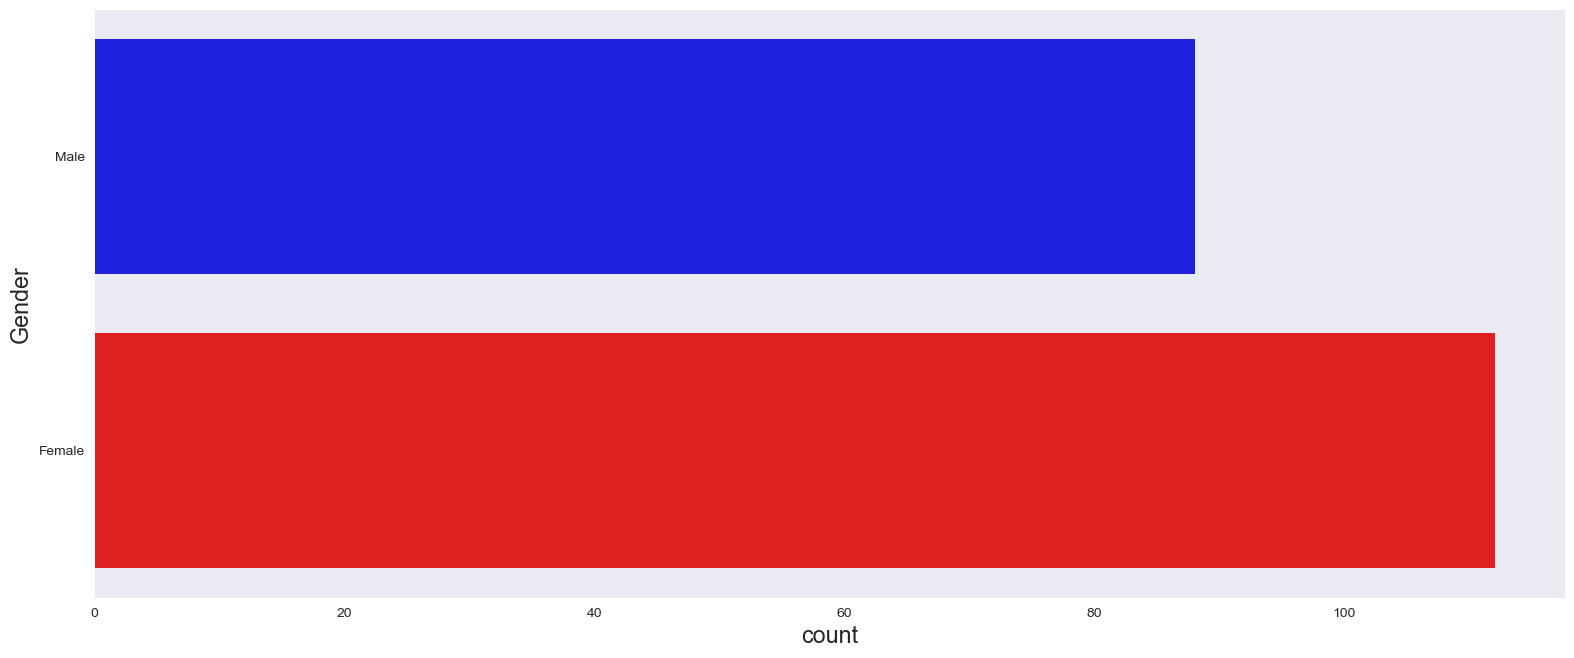

In [97]:
plt.figure(1, figsize=(15, 6))
sns.countplot(y='Gender', palette=['b', 'r'], data=df)
plt.show()

### Correlation between Age, Annual Income and Spending Score

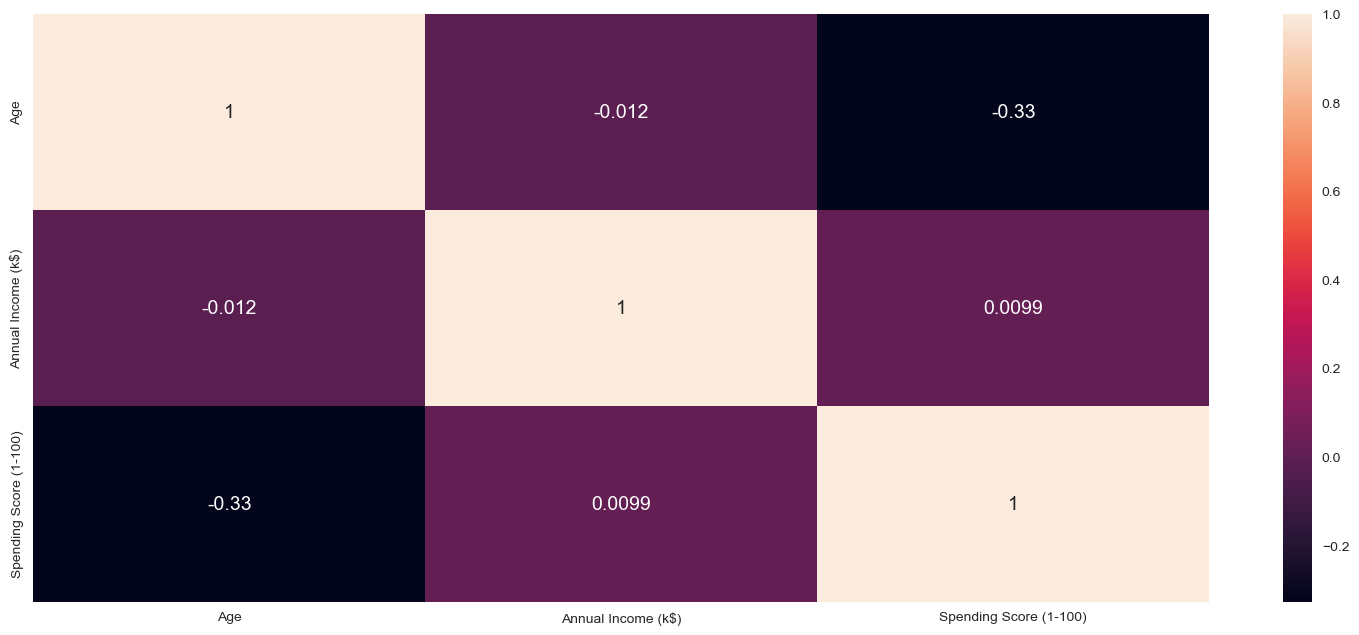

In [98]:
# Plot the Correlation between Age, Annual Income and Spending Score
plt.figure(1 , figsize = (15 , 6))
sns.heatmap(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
               ].corr(), annot=True,)
plt.show()

### Age and Annual Income Scatter Plot

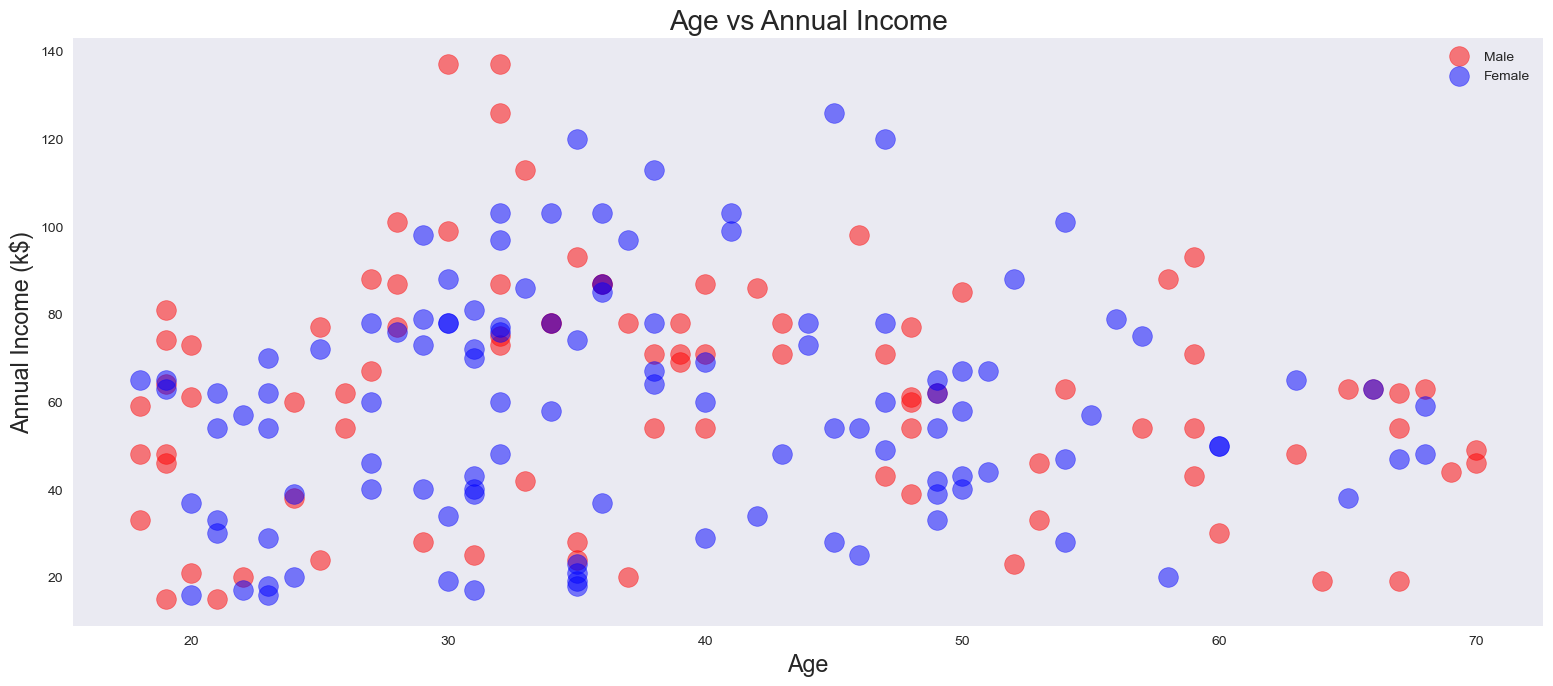

In [99]:
plt.figure(1, figsize=(15, 6))

for gender, color in zip(['Male', 'Female'], ['r', 'b']):
    plt.scatter(x='Age', y='Annual Income (k$)', data=df[df['Gender'] == gender],
                s=200, alpha=0.5, c=color, label=gender)

plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income')
plt.legend()
plt.show()

### Age and Spending Score Scatter Plot

In [108]:
plt.figure(1, figsize=(15, 6))

for gender, color in zip(['Male', 'Female'], ['r', 'b']):
    plt.scatter(x='Age', y='Spending Score (1-100)', data=df[df['Gender'] == gender],
                s=200, alpha=0.5, c=color, label=gender)

plt.xlabel('Age'), plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score')
plt.legend()
plt.show()

KeyError: 'Gender'

<Figure size 1500x600 with 0 Axes>

## Data Preprocessing

We'll keep the `Annual Income` and `Spending Score` columns for our analysis, and remove the other columns.

In [101]:
df = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df.rename(columns={'Annual Income (k$)': 'annual_income', 'Spending Score (1-100)': 'spending_score'}, inplace=True)

In [102]:
df.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Clustering using K-Means

In [103]:
# Within Cluster Sum of Squares
wcss = []

X = df.iloc[:,:].values
# Create a for loop to compute the WCSS for clusters of 1 through 10
for i in range(1, 11):
    # Creating and Fitting the KMeans model with i clusters
    kmeans = KMeans(n_clusters=i, n_init=10, init='k-means++', random_state=2)
    kmeans.fit(X)

    # Append the WCSS to the wcss list
    wcss.append(kmeans.inertia_)

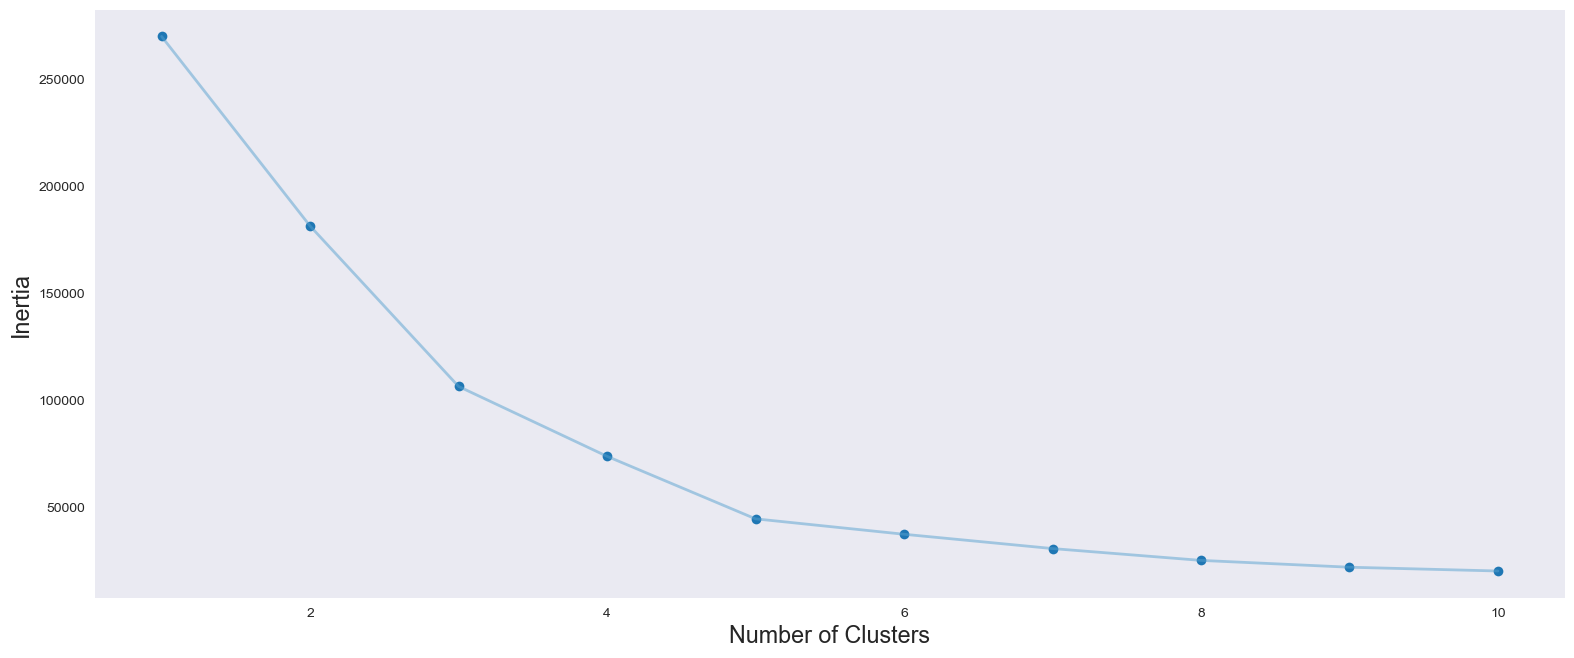

In [104]:
# Plotting the elbow curve to find the optimal number of clusters

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , wcss , 'o')
plt.plot(np.arange(1 , 11) , wcss , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

The Optimal Number of Clusters is: 5

***Creating and fitting a K-Menas model with 5 clusters***

In [105]:
kmeans = KMeans(n_clusters=5, n_init='auto',
                init='k-means++', random_state=42).fit(X)

## Plotting the clusters

In [106]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

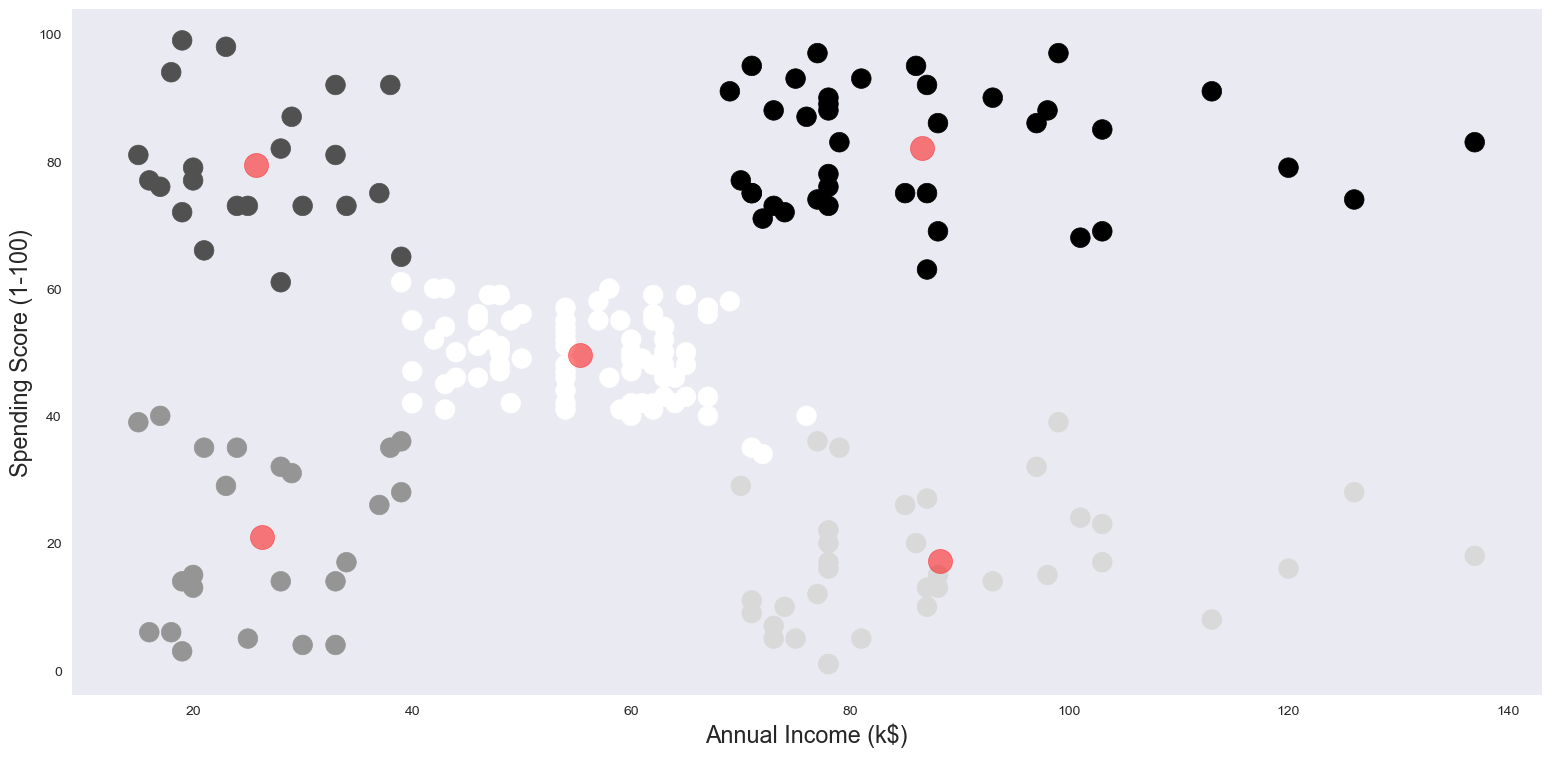

In [107]:
plt.figure(1 , figsize = (15 , 7) )

plt.scatter( x = 'annual_income' ,y = 'spending_score' , data = df , c = labels , 
            s = 200 )

plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 300 , c = 'red' , alpha = 0.5)

plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()